# Testing the Network with MNIST Dataset
For this test, I will use Scikit-Learn to download the dataset, since it has a built-in function for it. Keep in mind that the neural network in this notebook is not optimized for these kinds of tasks. Also, a convolutional network might be more appropriate here, instead of a fully-connected feedforward one.

## Download the MNIST dataset

In [45]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from activations import *

mnist = fetch_openml('mnist_784', as_frame=False)

/home/andres/miniconda3/envs/ml_book/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [46]:
mnist.target.shape

(70000,)

## Data Transformations
I will convert the target labels into one-hot encoded vectors so that the neural network is easier to train.
At the same time, I will normalize the data pixel data to be in the range [-1, 1] to help the neural network.

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(mnist.target.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [48]:
# now transform the target data using the encoder
encoded_targets = encoder.transform(mnist.target.reshape(-1,1)).toarray()
encoded_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(mnist.data)

encoded_targets = scaler.fit_transform(encoded_targets)

## Create a Mini Dataset for Training Toy Example
The full MNIST dataset has 70000 samples and this neural network is not designed for efficiency. Therefore, I will only use a fraction of the data to check how the network behaves.

In [50]:
# we will use only a portion of the dataset

train_data_size = 300
test_data_size  = 25

X_train = scaled_data[:train_data_size]        #mnist.data[:data_size]
y_train = encoded_targets[:train_data_size]    #mnist.target[:data_size]   #toarray() converts the sparse matrix output from one-hot encoding into a numpy array

X_test = scaled_data[train_data_size:train_data_size+test_data_size]       #mnist.data[data_size:data_size+200]
y_test = encoded_targets[train_data_size:train_data_size+test_data_size]  #mnist.target[data_size:data_size+200]

In [51]:
X_train.shape
y_train.shape

(300, 10)

In [52]:
#this function is taken from the book "Hands-on Machine Learning": 
# (ref. link) https://amzn.to/43SyF81

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

Image Label (one-hot encoded vector): [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]


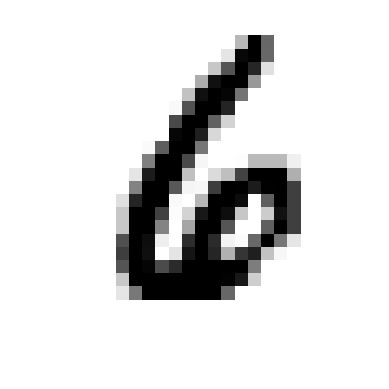

In [69]:
_idx = 155
img = X_train[_idx]
plot_digit(img)
print(f"Image Label (one-hot encoded vector): {y_train[_idx]}")

In [54]:
#here is the same data as a numpy array
img.reshape(28,28)

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

## Let's Create a Neural Network


In [64]:
#network hyperparameters

#-- topology
n_features = X_train.shape[1]
n_hidden_1 = int(n_features * 0.7) 
n_hidden_2 = int(n_hidden_1 * 0.5)
n_outputs  = y_train.shape[1]

topology   = [n_features, n_hidden_1, n_hidden_2, n_outputs]

#-- learning
learning_rate = 0.01
momentum = 0.1


In [65]:
from neural_networks import NeuralNet

nnet = NeuralNet(
    topology=topology,
    learning_rate=learning_rate,
    momentum=momentum, 
    init_method='xavier',
    hidden_activation_func=tanh,
)

nnet.shape

(784, 548, 274, 10)

In [57]:
nnet.n_trainable_params

583356

In [58]:
nnet.feedforward(X_test[0])

array([[-0.18014632,  0.07274652,  0.00701501,  0.0061341 ,  0.07958543,
         0.02260754, -0.05598693, -0.11431937, -0.01468035,  0.09811637]])

In [66]:
nnet.train(X_train, y_train, epochs=150)

---------------------------------------------
	-> training step: :0/150
		* current error: 570.9092380208318, threshold: 1e-10

---------------------------------------------
	-> training step: :20/150
		* current error: 679.7750144838453, threshold: 1e-10

---------------------------------------------
	-> training step: :40/150
		* current error: 688.6783956937184, threshold: 1e-10

---------------------------------------------
	-> training step: :60/150
		* current error: 687.2593745472036, threshold: 1e-10

---------------------------------------------
	-> training step: :80/150
		* current error: 696.4885057787252, threshold: 1e-10

---------------------------------------------
	-> training step: :100/150
		* current error: 667.5289436057762, threshold: 1e-10

---------------------------------------------
	-> training step: :120/150
		* current error: 668.3797104847773, threshold: 1e-10

---------------------------------------------
	-> training step: :140/150
		* current error: 670

664.8337823106687

In [67]:
for i in range(20):
    _x = X_test[[i]]
    _y = y_test[[i]]

    _learned_y = nnet.feedforward(_x)
    error = mean_squared_error(_y, _learned_y)

    print(error)

1.8902715231160372
1.9166259143751285
1.6776054254066963
1.987515793990009
1.9152625194023756
1.9166132213807208
1.9835060143534464
1.916668161123029
1.935775674720899
1.9863786366196607
1.9863000965807855
1.6756066367832818
1.8913183311303492
1.9151733640590947
2.002954441634004
1.98638572082803
1.983836201706499
1.9358138656865487
1.9362188460338488
1.915406882095307


In [61]:
_y

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

In [62]:
_learned_y

array([[-0.9999951 , -0.99998093, -0.99999378, -0.99994623, -0.9996368 ,
        -0.99992235, -0.99998145, -0.99997073, -0.99998295, -0.99995209]])